# Titanic: Machine Learning from Disaster
## Predict survival on the Titanic
### Data Science Workflow
1. Defining the problem statement
2. Collecting the data
3. Exploratory data analysis(EDA)
4. Feature Engineering
5. Modeling
6. Evaluation

## 1. Defining the problem statement

타이타닉 호에서 어떤 사람이 살아 남았는지 주어진 데이터를 분석해서 예측하시오.

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. Collecting the data

Training 데이터와 Test 데이터, 샘플 Submission 데이터는 캐글에서 받을 수 있습니다.


다운로드 링크 : [kaggle](https://www.kaggle.com/c/titanic/data)

### Python 라이브러리 임포트
#### numpy, pandas, matplotlib, seaborn, scikit-learn

In [2]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')
# ---

import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

from matplotlib import pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

%matplotlib inline

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.cross_validation import cross_val_score

/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Pandas를 이용한 데이터 로딩

In [4]:
data_train_raw = pd.read_csv('data/train.csv')
data_train = data_train_raw.copy(deep = True)
data_train.drop(['PassengerId'], axis=1, inplace=True)

data_test_raw = pd.read_csv('data/test.csv')
data_test = data_test_raw.copy(deep = True)
data_test_passenger_id = data_test.PassengerId
data_test.drop(['PassengerId'], axis=1, inplace=True)

data_combined = [data_train, data_test]

## 3. Exploratory data analysis(EDA)
### Data Dictionary
- PassengerId: Passenger Id
- Survived: 	0 = No, 1 = Yes
- Pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- Name: Passenger Name
- Sex: Passenger Gender
- Age: Passenger Age
- SibSp:	# of siblings / spouses aboard the Titanic
- Parch:	# of parents / children aboard the Titanic
- Ticket:	Ticket number
- Fare: Passenger Fare
- Cabin:	Cabin Number
- Embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Training 데이터 20개를 출력해봅니다.

In [5]:
data_train_raw.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Pandas info() API로 Training 데이터의 개수와 컬럼 개수, 컬럼명 및 데이터 타입을 확인할 수 있고, Missing 데이터도 확인할 수 있습니다. 

In [6]:
data_train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Pandas describe() API로 수치형 데이터의 통계 정보를 확인할 수 있습니다.

In [7]:
data_train_raw.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Test 데이터도 마찬가지로 살펴봅니다.

In [8]:
data_test_raw.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [9]:
data_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [10]:
data_test_raw.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


Training 데이터와 Test 데이터에서 Null인 데이터가 몇 개인지 확인해봅니다.

In [11]:
print('Train Data columns with null values:')
print(data_train.isnull().sum())
print("-"*40)
print('Test Data columns with null values:')
print(data_test.isnull().sum())

Train Data columns with null values:
Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64
----------------------------------------
Test Data columns with null values:
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64


범주형 데이터와 생존 여부의 상관관계를 살펴봅니다.

In [12]:
# Discrete Variable Correlation by Survival using
# group by aka pivot table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html
columns = data_train.columns.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'Fare', 'Age']).values
print(columns)
for x in columns:
    print(data_train[x].dtype)
    if data_train[x].dtype != 'float64' :
        print('Survival Correlation by:', x)
        print(data_train[[x, 'Survived']].groupby(x, as_index=False).mean())
        print('-'*20, '\n')

['Pclass' 'Sex' 'SibSp' 'Parch' 'Embarked']
int64
Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
-------------------- 

object
Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
-------------------- 

int64
Survival Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
-------------------- 

int64
Survival Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
-------------------- 

object
Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957
-------------------- 



1등석이 가장 살아날 확률이 높고, 여자가 남자보다 살아날 확률이 높고, 가족이 있는 사람이 좀 더 살아날 확률이 높은 걸 확인할 수 있습니다.

살아남은 사람은 몇 명이나 되는지 차트로 확인합니다.

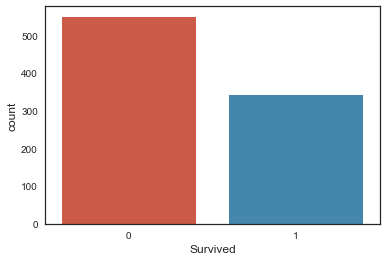

In [13]:
sns.countplot(x='Survived', data=data_train)

남녀 살아남은 사람이 얼마나 되는지 확인합니다.

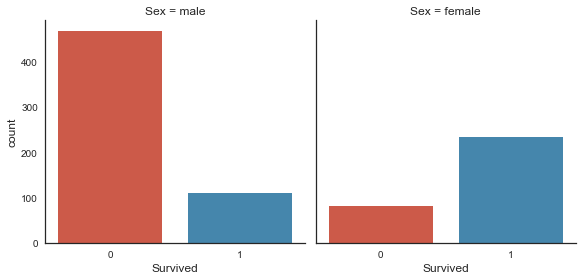

In [14]:
sns.factorplot(x='Survived', col='Sex', kind='count', data=data_train)

객석 등급에 따라 살아남은 사람이 얼마나 되는지 확인합니다.

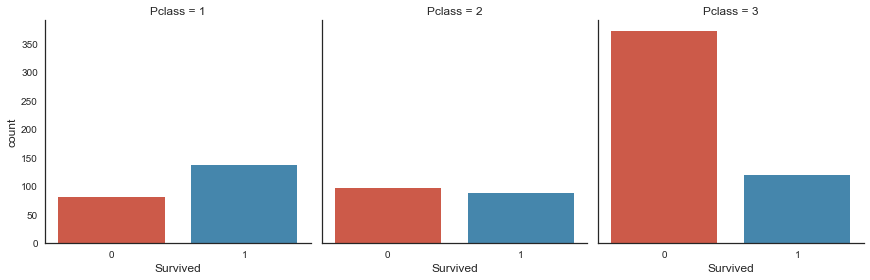

In [15]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=data_train)

탑승 항구에 따라 살아남은 사람이 얼마나 되는지 확인합니다.

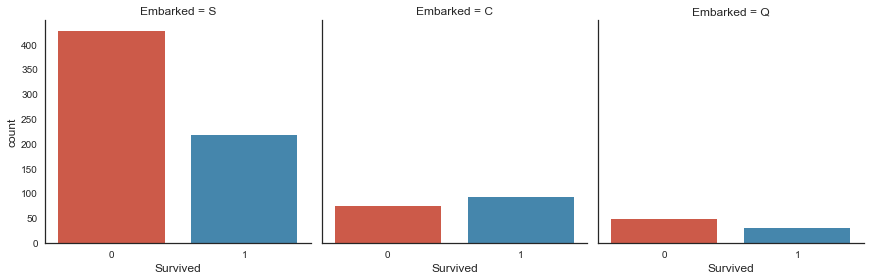

In [16]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=data_train)

승객의 연령 분포를 살펴봅니다.

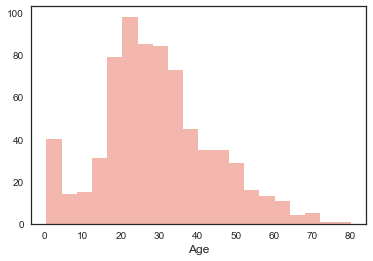

In [17]:
data_train_age = data_train.dropna(subset=['Age'])
sns.distplot(data_train_age.Age, kde=False)

승객의 생존 여부에 따른 연령 분포를 차트로 확인해봅니다. 

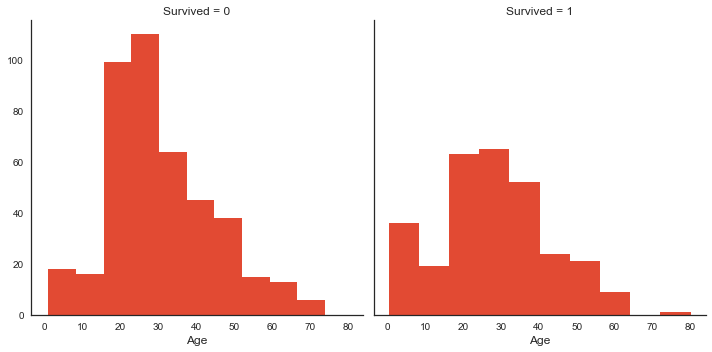

In [18]:
g = sns.FacetGrid(data_train_age, col='Survived', size=5)
g.map(plt.hist, 'Age', bins=10)

운임 분포를 차트로 살펴봅니다.

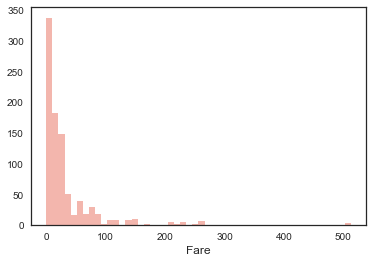

In [19]:
data_train_fare = data_train.dropna(subset=['Fare'])
sns.distplot(data_train_fare.Fare, kde=False)

생존 여부에 따른 운임 분포를 살펴봅니다.

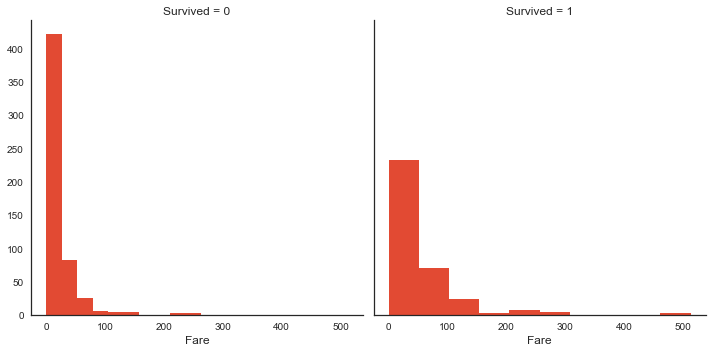

In [20]:
g = sns.FacetGrid(data_train_fare, col='Survived', size=5)
g.map(plt.hist, 'Fare', bins=10)

## 4. Feature engineering

피쳐 엔지니어링은 EDA를 통해 도출된 지식과 도메인 지식을 활용해서 머신 러닝 알고리즘이 잘 작동하도록 하는 피쳐 벡터를 만드는 과정을 말합니다.

피쳐 벡터는 데이터의 특징을 가지고 있는 수치 형태의 다차원 벡터입니다. 대부분의 머신 러닝 알고리즘은 데이터 처리 및 통계 분석을 쉽게할 수 있도록 수치형 데이터를 필요로 합니다.

### 타이타닉은 어떻게 침몰했나요?
아래 그림을 보면 타이타닉 호의 뱃머리부터 침몰한 걸 알 수 있는데, 뱃머리에 있는 3등석 승객은 거의 살아남기 힘들것 이라고 추측할 수 있습니다.

또한 좌석이 좋을 수록 배의 위쪽 자리에 위치해 있기 때문에 살아남을 확률이 높을 것 같습니다.

그래서 좌석 등급을 나타내는 Pclass가 생존 여부를 결정하는 핵심 피쳐라고 볼 수 있겠습니다.

In [21]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg")

먼저 pandas의 fillna() API를 사용해서 결측치가 있는 데이터를 채워줍니다.

여러가지 방법이 있는데 수치형 데이터의 경우 평균이나 중위값으로 채워주고, 범주형 데이터는 최빈치로 채워주도록 하겠습니다.

In [22]:
for data in data_combined:
    data.Fare.fillna(data.Fare.mean(), inplace=True)
    data.Embarked.fillna(data.Embarked.mode()[0], inplace=True)
    data.Cabin.fillna('U', inplace=True) # 'U' means Unknown
    # mapping each Cabin value with the cabin letter
    data['Cabin'] = data['Cabin'].map(lambda c : c[0].upper())
    
print(data_train.isnull().sum())
print("-"*20)
print(data_test.isnull().sum())

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64
--------------------
Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         0
Cabin        0
Embarked     0
dtype: int64


이름을 살펴보면 두 번째 단어에 신분이나 직위를 나타내는 단어가 있음을 알 수 있습니다.

그런데 종류가 너무 많으니 몇 가지로 분류해서 매핑하고 이름 데이터는 삭제합니다.

In [23]:
for data in data_combined:
    # we extract the title from each name
    data['Title'] = data['Name'].map(lambda name: name.split(',')[1].split('.')[0].strip())
    
    # a map of more aggregated titles
    Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royalty",
                        "Don":        "Royalty",
                        "Sir" :       "Royalty",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "the Countess":"Royalty",
                        "Dona":       "Royalty",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royalty"
                        }
    
    # we map each title
    data['Title'] = data.Title.map(Title_Dictionary)
    data.drop(['Name'], axis=1, inplace=True)

SibSp와 Parch를 더하고 자기 자신을 더해서 FamilySize라는 새로운 피쳐를 만듭니다.

또, FamilySize가 1인 사람은 가족이 없는 사람이기 때문에 가족 여부를 구분할 수 있는 IsAlone이라는 새로운 피쳐를 만듭니다.

그리고 pandas의 qcut() API를 사용해서 운임을 구간별로 나누고 FareBin이라는 피쳐에 저장합니다.

마지막으로 SibSp, Parch, Fare는 삭제하도록 합니다.

In [24]:
for data in data_combined:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

    data['IsAlone'] = 1 # initialize to yes/1 is alone
    data['IsAlone'].loc[data['FamilySize'] > 1] = 0
    data['FareBin'] = pd.qcut(data['Fare'], 4)
    data.drop(['SibSp', 'Parch', 'Fare'], axis=1, inplace=True)

티켓 데이터도 승객 자리의 어떤 특성을 반영할 수 있기 때문에 문자로 된 부분만 남기도록 처리합니다.

In [25]:
def cleanTicket(ticket):
    ticket = ticket.replace('.','')
    ticket = ticket.replace('/','')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = filter(lambda t : not t.isdigit(), ticket)
    ticket = list(ticket)
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'
    
for data in data_combined:
    # Extracting dummy variables from tickets:
    data['Ticket'] = data['Ticket'].map(cleanTicket)

In [26]:
data_train.head()

,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin
0,0,3,male,22.0,A5,U,S,Mr,2,0,"(-0.001, 7.91]"
1,1,1,female,38.0,PC,C,C,Mrs,2,0,"(31.0, 512.329]"
2,1,3,female,26.0,STONO2,U,S,Miss,1,1,"(7.91, 14.454]"
3,1,1,female,35.0,XXX,C,S,Mrs,2,0,"(31.0, 512.329]"
4,0,3,male,35.0,XXX,U,S,Mr,1,1,"(7.91, 14.454]"


이제 문자열로 된 범주형 데이터나 구간으로 된 데이터를 수치로 된 범주형 데이터로 변환합니다.

scikit-learn의 LabelEncoder를 사용해서 쉽게 처리할 수 있습니다.

In [27]:
label = LabelEncoder()
for data in data_combined:    
    data['Sex'] = label.fit_transform(data['Sex'])
    data['Ticket'] = label.fit_transform(data['Ticket'])
    data['Cabin'] = label.fit_transform(data['Cabin'])
    data['Embarked'] = label.fit_transform(data['Embarked'])
    data['Title'] = label.fit_transform(data['Title'])
    data['FareBin'] = label.fit_transform(data['FareBin'])

In [28]:
data_train.head()

,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin
0,0,3,1,22.0,1,8,2,2,2,0,0
1,1,1,0,38.0,10,2,0,3,2,0,3
2,1,3,0,26.0,26,8,2,1,1,1,1
3,1,1,0,35.0,30,2,2,3,2,0,3
4,0,3,1,35.0,30,8,2,2,1,1,1


In [29]:
data_train.describe()

,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,25.303030,6.716049,1.536476,1.903479,1.904602,0.602694,1.497194
std,0.486592,0.836071,0.477990,14.526497,9.110691,2.460739,0.791503,0.807061,1.613459,0.489615,1.118156
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,28.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.500000
50%,0.000000,3.000000,1.000000,28.000000,30.000000,8.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,38.000000,30.000000,8.000000,2.000000,2.000000,2.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,30.000000,8.000000,2.000000,5.000000,11.000000,1.000000,3.000000


아직 나이에 대한 결측 데이터 처리를 안했는데요.

단순히 중간값으로 채우지 않고 성별, 타이틀별로 연령대가 비슷할 거라고 추정할 수 있을 것 같으니,

성별, 타이틀별의 나이의 중간값을 구하고 이 값으로 채워주도록 합니다.

In [30]:
guess_ages = np.zeros((2,6))

for data in data_combined:
    for i in range(0, 2): # Sex
        for j in range(0, 6): # Title
            guess_df = data[(data['Sex'] == i) & \
                                  (data['Title'] == j)]['Age'].dropna()

            age_guess = guess_df.median()

            if age_guess > 0:
                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 6):
            data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j),\
                    'Age'] = guess_ages[i,j]

    data['Age'] = data['Age'].astype(int)

print(guess_ages)
data_train.describe()

[[  0.   22.    0.   36.5  49.   39. ]
 [  7.    0.   28.5   0.   47.   40. ]]


,Survived,Pclass,Sex,Age,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,25.948373,25.303030,6.716049,1.536476,1.903479,1.904602,0.602694,1.497194
std,0.486592,0.836071,0.477990,16.530178,9.110691,2.460739,0.791503,0.807061,1.613459,0.489615,1.118156
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,17.000000,28.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.500000
50%,0.000000,3.000000,1.000000,27.000000,30.000000,8.000000,2.000000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,30.000000,8.000000,2.000000,2.000000,2.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,30.000000,8.000000,2.000000,5.000000,11.000000,1.000000,3.000000


이제 나이도 운임과 마찬가지로 구간별 나눠서 AgeBin이라는 새로운 피쳐에 저장하고 Age 피쳐는 삭제합니다.

In [31]:
for data in data_combined:
    data['AgeBin'] = pd.cut(data['Age'], 10)
    data.drop(['Age'], axis=1, inplace=True)
    
data_train.head()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin
0,0,3,1,1,8,2,2,2,0,0,"(16.0, 24.0]"
1,1,1,0,10,2,0,3,2,0,3,"(32.0, 40.0]"
2,1,3,0,26,8,2,1,1,1,1,"(24.0, 32.0]"
3,1,1,0,30,2,2,3,2,0,3,"(32.0, 40.0]"
4,0,3,1,30,8,2,2,1,1,1,"(32.0, 40.0]"


구간으로 된 AgeBin 피쳐를 마찬가지로 LabelEncoder를 사용해서 수치로 된 범주형 데이터로 변환합니다.

In [32]:
label = LabelEncoder()
for data in data_combined:    
    data['AgeBin'] = label.fit_transform(data['AgeBin'])

data_train.describe()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked,Title,FamilySize,IsAlone,FareBin,AgeBin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,25.303030,6.716049,1.536476,1.903479,1.904602,0.602694,1.497194,2.766554
std,0.486592,0.836071,0.477990,9.110691,2.460739,0.791503,0.807061,1.613459,0.489615,1.118156,1.948622
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,28.000000,8.000000,1.000000,1.000000,1.000000,0.000000,0.500000,2.000000
50%,0.000000,3.000000,1.000000,30.000000,8.000000,2.000000,2.000000,1.000000,1.000000,1.000000,3.000000
75%,1.000000,3.000000,1.000000,30.000000,8.000000,2.000000,2.000000,2.000000,1.000000,2.000000,4.000000
max,1.000000,3.000000,1.000000,30.000000,8.000000,2.000000,5.000000,11.000000,1.000000,3.000000,9.000000


Seaborn의 pairplot() 차트를 사용해서 생존 여부와 각 피쳐의 관계를 살펴봅니다.

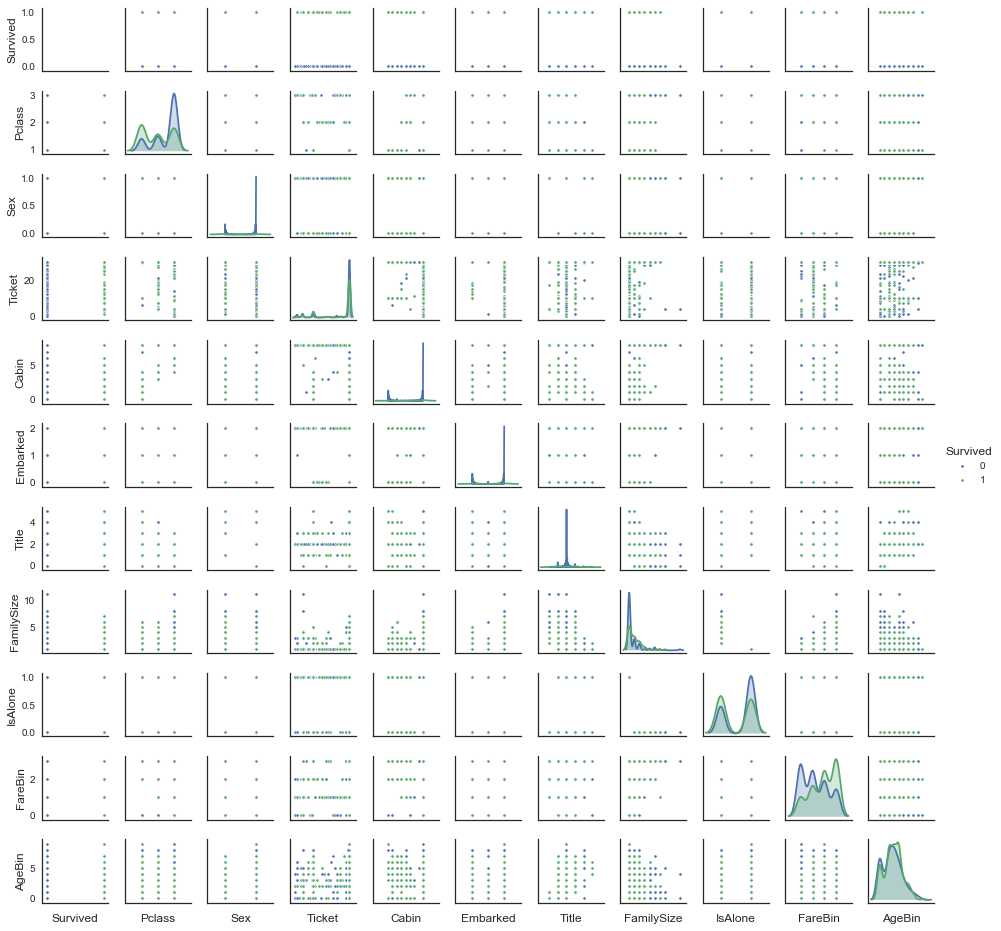

In [33]:
# pair plots of entire dataset
pp = sns.pairplot(data_train, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])

Seaborn의 heatmap 차트를 사용해서 각 피쳐 간의 상관관계를 살펴봅니다.

1에 가까울 수록 양의 상관관계가 높고 -1에 가까울 수록 음의 상관관계가 높다는 걸 의미합니다.

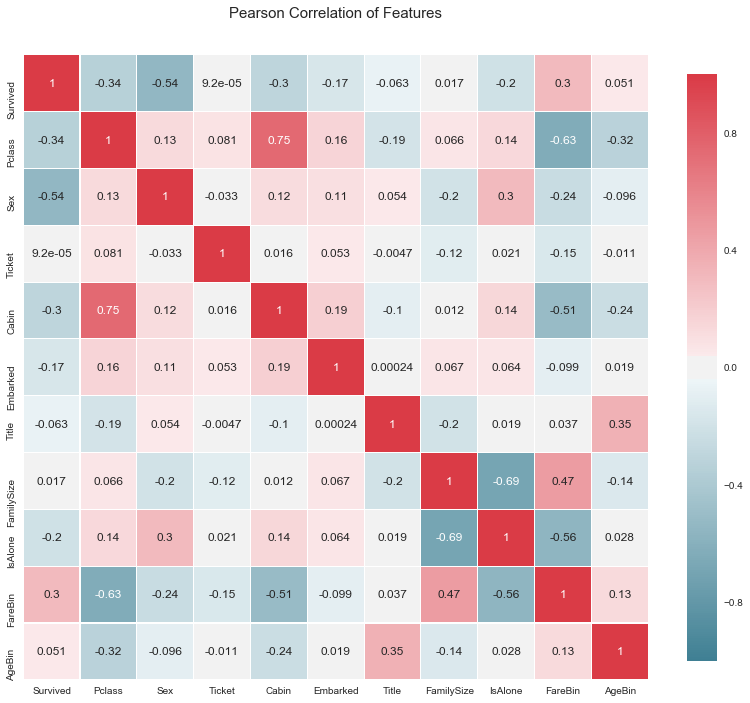

In [34]:
# correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(data_train)

## 5. Modeling

이제 머신러닝 알고리즘으로 모델링을 할 차례입니다.

피쳐 엔지니어링이 끝난 데이터를 train, test, target 데이터로 나눕니다.

In [35]:
train, test, target = data_train.drop(['Survived'], axis=1), data_test, data_train_raw.Survived

### 앙상블모델 - 랜덤포레스트
<img src="images/random_forest.jpg" width="600" height="400" />

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(train, target)

scikit-learn의 분류 알고리즘은 ``feature_importances_`` 속성을 통해 분류하는데 어떤 피쳐가 얼마나 중요한 영향을 끼쳤는지 확인할 수 있는 기능을 제공합니다.

In [37]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

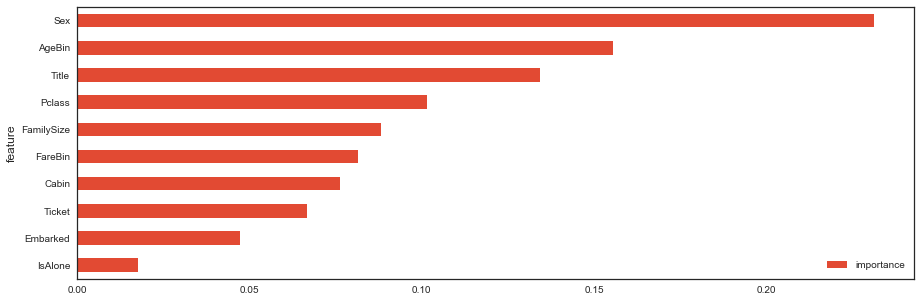

In [38]:
features.plot(kind='barh', figsize=(15, 5))

In [39]:
model = SelectFromModel(clf, prefit=True)
train_reduced = model.transform(train)
train_reduced.shape

(891, 4)

In [40]:
test_reduced = model.transform(test)
test_reduced.shape

(418, 4)

In [41]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

### Cross Validation 교차 검증
* 일반화 성능을 측정하기 위해 데이터를 여러 번 반복해서 나누고 모델을 학습합니다.
* KFold 교차 검증 
    * 데이터를 폴드라 부르는 비슷한 크기의 부분집합(n_splits)으로 나누고 각각의 폴드 정확도를 측정합니다.
    * 첫 번째 폴드를 Test 세트로 사용하고 나머지 폴드를 Training 세트로 사용하여 학습합니다.
    * 나머지 Training 세트로 만들어진 세트의 정확도를 첫 번째 폴드로 평가합니다.
    * 다음은 두 번째 폴드가 Test 세트가 되고 나머지 폴드의 Training 세트를 두 번째 폴드로 정확도를 측정합니다.
    * 이 과정을 마지막 폴드까지 반복합니다.
    * 이렇게 Training 세트와 Test 세트로 나누는 N개의 분할마다 정확도를 측정하여 평균값을 낸게 정확도가 됩니다.
<img src="images/cv_kfold.png" width="600" height="400" />
* Stratified KFold 교차 검증
    * 데이터의 분포가 불균형인 데이터에서 같은 비율로 KFold를 나누는 방식입니다.
    * 분류 문제에서 데이터 분포가 불균형일 때 동일한 비율로 나눠서 테스트 하는 것이 매우 중요합니다.
    
<img src="images/cv_stratified_kfold.png" width="600" height="400" />

### Grid Search
머신러닝 알고리즘은 트레이닝 후에 각 알고리즘에서 사용하는 하이퍼 파라미터를 최적화해서 예측 정확도를 향상시켜야 합니다.

scikit-learn에서는 GridSearchCV 클래스를 통해 사용하려는 머신러닝 알고리즘의 하이퍼 파라미터를 dictionary로 정의하고 트레이닝 시키면

가장 좋은 예측 결과가 나오는 최적의 하이퍼 파라미터를 찾아줍니다.

In [42]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = False

if run_gs:
    parameter_grid = {
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [10, 50, 100],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 3, 10],
                 'min_samples_leaf': [1, 3, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(target, n_folds=5)

    grid_search = GridSearchCV(forest,
                               scoring='accuracy',
                               param_grid=parameter_grid,
                               cv=cross_validation)

    grid_search.fit(train, target)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
else:
    parameters = {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_leaf': 1,
                  'max_depth': 8, 'min_samples_split': 3, 'n_estimators': 10}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train, target)
    print(compute_score(model, train, target, scoring='accuracy'))

0.827215459891


이제 마지막으로 하이퍼 파라미터 최적화까지 마친 머신러닝 모델에 Test 데이터로

타이타닉 승객의 생존 여부를 예측하고 캐글에서 원하는 형식으로 결과 파일을 만들어서 저장합니다.

In [43]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
df_output['PassengerId'] = data_test_raw.PassengerId
df_output['Survived'] = output
df_output[['PassengerId','Survived']].to_csv('data/predictions/output.csv',index=False)

## References

이 주피터 노트북은 다음 링크를 참고해서 만들었습니다:

- [https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb](https://github.com/minsuk-heo/kaggle-titanic/blob/master/titanic-solution.ipynb)
- [How to score 0.8134 in Titanic Kaggle Challenge](http://ahmedbesbes.com/how-to-score-08134-in-titanic-kaggle-challenge.html)
- [https://github.com/corazzon/KaggleStruggle/blob/master/bike-sharing-demand/bike-sharing-demand-rf.ipynb](https://github.com/corazzon/KaggleStruggle/blob/master/bike-sharing-demand/bike-sharing-demand-rf.ipynb)